In [ ]:
# Instalar DiCE
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargar el archivo CSV en un DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/TFM_CRC_MICROBIOME.csv')

print(dataset.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_H  \
0                                           0.637630                                                
1                                           0.237705                                                
2                                           0.038784                                                
3                                           0.004594                                                
4                                           0.025618                                                

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A_737866;f__Enterobacteriaceae_A;g__Klebsiella_724518  \
0                                           0.307338                                                                                
1                       

In [ ]:
# Crear una lista de columnas a eliminar
columnas_a_eliminar = []

# Procesar cada columna excepto la primera y las dos últimas
for columna in dataset.columns[1:-2]:
    # Separar la columna por punto y coma
    separados = columna.split(';')

    # Verificar si se obtienen exactamente 6 nombres
    if len(separados) == 6:
        # Renombrar la columna con el último de los nombres
        nuevo_nombre = separados[-1]
        dataset = dataset.rename(columns={columna: nuevo_nombre})
    else:
        # Agregar a la lista de columnas a eliminar
        columnas_a_eliminar.append(columna)

# Eliminar las columnas que no cumplen con la condición
dataset = dataset.drop(columns=columnas_a_eliminar)

# Mostrar el dataframe procesado
print(dataset)

      Unnamed: 0  g__Bacteroides_H  g__Klebsiella_724518  g__Parvimonas  \
0              0          0.637630              0.307338       0.027949   
1              1          0.237705              0.000000       0.044057   
2              2          0.038784              0.000000       0.003641   
3              3          0.004594              0.000000       0.000000   
4              4          0.025618              0.000000       0.032154   
...          ...               ...                   ...            ...   
2843        2843          0.101386              0.000000       0.000000   
2844        2844          0.072412              0.000000       0.000000   
2845        2845          0.255244              0.000000       0.000243   
2846        2846          0.242867              0.000000       0.000000   
2847        2847          0.200762              0.000000       0.000000   

      g__Fusobacterium_C  g__Pygmaiobacter  g__Erysipelatoclostridium  \
0               0.017960  

In [ ]:
# Obtener los IDs únicos de la columna PRJA
unique_ids = dataset['PRJA'].unique()

# Dividir los IDs en train (80%) y test (20%)
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=0)

# Crear los dataframes de train y test basados en los IDs seleccionados
train_df = dataset[dataset['PRJA'].isin(train_ids)]
test_df = dataset[dataset['PRJA'].isin(test_ids)]

# Mostrar el tamaño de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")

# Separar características (X) y etiquetas (y)
X_train = train_df.iloc[:, 1:-2]  # Todas las columnas excepto la primera, la penúltima y la última
y_train = train_df.iloc[:, -2]    # La penúltima columna es 'Label'
X_test = test_df.iloc[:, 1:-2]
y_test = test_df.iloc[:, -2]

Tamaño del conjunto de entrenamiento: (2632, 1255)
Tamaño del conjunto de prueba: (216, 1255)


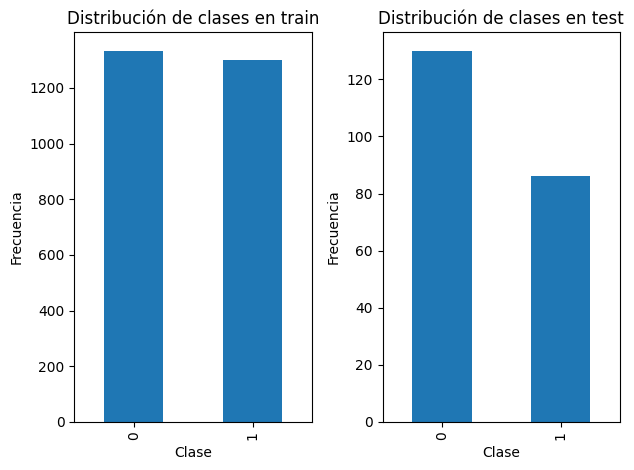

In [ ]:
# Histograma del conjunto de entrenamiento
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución de clases en train')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Histograma del conjunto de prueba
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar')
plt.title('Distribución de clases en test')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
import numpy as np

# Cargar el modelo desde Google Drive
best_model = joblib.load('/content/drive/My Drive/modelos/mejor_modelo.pkl')

# Cargar las columnas seleccionadas desde Google Drive
selected_columns = np.load('/content/drive/My Drive/modelos/columnas_seleccionadas.npy', allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
X_test_final = X_test[selected_columns]  # Asegurarse de usar las mismas columnas seleccionadas
y_pred_best = best_model.predict(X_test_final)
y_pred_proba_best = best_model.predict_proba(X_test_final)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Mejor modelo - Accuracy: {accuracy_best}, AUC: {auc_best}")
print("Ensemble de Modelos con SMOTE y Selección de Características")
print(f"Classification Report:\n{report_best}")

Mejor modelo - Accuracy: 0.7962962962962963, AUC: 0.8203935599284438
Ensemble de Modelos con SMOTE y Selección de Características
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       130
           1       0.76      0.71      0.73        86

    accuracy                           0.80       216
   macro avg       0.79      0.78      0.78       216
weighted avg       0.79      0.80      0.79       216



In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    exp = Dice(d, m, method="genetic")
    # Suponiendo que `best_model` es tu modelo entrenado y `X_test_final` es tu conjunto de prueba

    # Seleccionar la primera instancia y predecir su clase
    query_instance = X_test_final.iloc[0:1]
    predicted_class = best_model.predict(query_instance)[0]

    # Si la clase predicha no es 0, buscar otra instancia en X_test_final que esté clasificada como 0
    if predicted_class != 0:
        for i in range(1, len(X_test_final)):
            query_instance = X_test_final.iloc[i:i+1]
            predicted_class = best_model.predict(query_instance)[0]
            if predicted_class == 0:
                print(f"Instancia en la posición {i} clasificada como 0 encontrada.")
                break
        else:
            print("No se encontró ninguna instancia clasificada como 0 en X_test_final.")
    else:
        print("La primera instancia ya está clasificada como 0.")

# Ahora `query_instance` debería estar clasificada como 0


    # Generar contrafactuales con DiCE
    dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=1, desired_class="opposite")
    dice_exp.visualize_as_dataframe(show_only_changes=True)
else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
Instancia en la posición 7 clasificada como 0 encontrada.


100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.090765,0.0,0.04504,0.207696,0.0,0.000294,0.000783,0.0,0.000473,0.008124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,0.2,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    # Seleccionar la primera instancia con etiqueta 0
    query_instance = X_test_final[y_test == 0].iloc[0:1]

    if query_instance.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance, total_CFs=1, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

        # Generar contrafactuales con DiCE utilizando el método aleatorio
        exp_random = Dice(d, m, method="random")
        dice_exp_random = exp_random.generate_counterfactuals(query_instance, total_CFs=1, desired_class="opposite")
        print("Contrafactuales generados por el método aleatorio:")
        dice_exp_random.visualize_as_dataframe(show_only_changes=True)

        # Generar contrafactuales con DiCE utilizando el método kd-tree
        exp_kdtree = Dice(d, m, method="kdtree")
        dice_exp_kdtree = exp_kdtree.generate_counterfactuals(query_instance, total_CFs=1, desired_class="opposite")
        print("Contrafactuales generados por el método kd-tree:")
        dice_exp_kdtree.visualize_as_dataframe(show_only_changes=True)
else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [00:03<00:00,  3.65s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dice_ml/explainer_interfaces/dice_random.py:165: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_instance_df[self.data_interface.outcome_name] = \
100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

Contrafactuales generados por el método aleatorio:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dice_ml/explainer_interfaces/dice_KD.py:125: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.final_cfs_df[self.data_interface.outcome_name] = self.cfs_preds
100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

Contrafactuales generados por el método kd-tree:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
421,0.2,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
query_instance

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__UBA2730,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067
1090,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Contar cuántos elementos son 0 en query_instance
count_zeros_query = (query_instance == 0).sum(axis=1).iloc[0]
total_elements_query = query_instance.shape[1]

print(f"Número de elementos que son 0 en query_instance: {count_zeros_query} de {total_elements_query} elementos")

Número de elementos que son 0 en query_instance: 438 de 498 elementos


In [ ]:
# Calcular la suma, el valor máximo y el valor mínimo de las columnas de query_instance
sum_query_instance = query_instance.sum(axis=1).iloc[0]
max_query_instance = query_instance.max(axis=1).iloc[0]
min_query_instance = query_instance.min(axis=1).iloc[0]

# Encontrar la columna en la que se alcanza el valor máximo
max_column_query_instance = query_instance.idxmax(axis=1).iloc[0]

print("Suma de las componentes de la instancia original (query_instance):", sum_query_instance)
print("Máximo valor de las componentes de la instancia original (query_instance):", max_query_instance)
print("Mínimo valor de las componentes de la instancia original (query_instance):", min_query_instance)
print("Columna en la que se alcanza el valor máximo:", max_column_query_instance)

Suma de las componentes de la instancia original (query_instance): 0.9993737640079091
Máximo valor de las componentes de la instancia original (query_instance): 0.4240276862228082
Mínimo valor de las componentes de la instancia original (query_instance): 0.0
Columna en la que se alcanza el valor máximo: g__Collinsella


In [ ]:
query_instance['g__Fusicatenibacter']

,g__Fusicatenibacter
1090,0.004219


In [ ]:
import pandas as pd
import json

# Suponiendo que el conjunto de entrenamiento está en un DataFrame llamado X_train_final
# Y la instancia contrafactual generada por kd-tree está en una variable llamada dice_exp_kdtree

# Convertir la instancia contrafactual a un DataFrame
counterfactual_kdtree_df = dice_exp_kdtree.cf_examples_list[0].final_cfs_df

# Convertir la instancia contrafactual a JSON
counterfactual_json = counterfactual_kdtree_df.to_json(orient='records')

# Convertir todas las filas del conjunto de entrenamiento a JSON
training_data_json = X_train_final.to_json(orient='records')

# Parsear los JSON para obtener listas de diccionarios
counterfactual_list = json.loads(counterfactual_json)
training_data_list = json.loads(training_data_json)

# Verificar si la instancia contrafactual está en el conjunto de entrenamiento
is_in_training = any(counterfactual_list[0] == training_instance for training_instance in training_data_list)

if is_in_training:
    print("La instancia contrafactual generada pertenece al conjunto de entrenamiento.")
else:
    print("La instancia contrafactual generada NO pertenece al conjunto de entrenamiento.")

La instancia contrafactual generada NO pertenece al conjunto de entrenamiento.


In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
query_instance_gen = query_instance.copy()
query_instance_gen['Label'] = 1

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)

Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label): 0.1
Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label): 0.3


In [ ]:
# Eliminar la columna 'Label' de los DataFrames contrafactuales
df_cfs_list_gen_no_label = df_cfs_list_gen.drop(columns=['Label'])
df_cfs_list_random_no_label = df_cfs_list_random.drop(columns=['Label'])

# Repetir la instancia original tantas veces como el número de contrafactuales para poder comparar
query_instance_repeated = pd.concat([query_instance] * df_cfs_list_gen_no_label.shape[0], ignore_index=True)

# Comparar los DataFrames
changes_gen = (query_instance_repeated != df_cfs_list_gen_no_label).sum(axis=1)
changes_random = (query_instance_repeated != df_cfs_list_random_no_label).sum(axis=1)

# Contar cuántas columnas cambiaron en cada contrafactual
num_changes_gen = changes_gen.sum()
num_changes_random = changes_random.sum()

print("Número total de columnas que han cambiado en el contrafactual genético:", num_changes_gen)
print("Número total de columnas que han cambiado en el contrafactual aleatorio:", num_changes_random)

Número total de columnas que han cambiado en el contrafactual genético: 60
Número total de columnas que han cambiado en el contrafactual aleatorio: 2


In [ ]:
df_cfs_list_gen

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Filtrar las columnas en el contrafactual genético que son distintas de 0
non_zero_columns_gen = df_cfs_list_gen.iloc[0][df_cfs_list_gen.iloc[0] != 0]

print("Columnas del contrafactual genético distintas de 0 y sus valores:")
print(non_zero_columns_gen)

Columnas del contrafactual genético distintas de 0 y sus valores:
g__Fusicatenibacter    0.1
Label                  1.0
Name: 0, dtype: float64


In [ ]:
# Calcular las diferencias absolutas entre el contrafactual aleatorio y la instancia original
differences_random = (df_cfs_list_random.iloc[0] - query_instance.iloc[0]).abs()

# Filtrar las columnas que han cambiado (diferencias mayores a 0)
changed_columns_random = differences_random[differences_random > 0]

# Obtener los nuevos valores de esas variables en el contrafactual aleatorio
new_values_random = df_cfs_list_random.iloc[0][changed_columns_random.index]

# Mostrar los resultados
print("Las variables que han cambiado en el contrafactual aleatorio son:")
print(changed_columns_random)
print("Los nuevos valores de estas variables en el contrafactual aleatorio son:")
print(new_values_random)

Las variables que han cambiado en el contrafactual aleatorio son:
g__Collinsella       0.424028
g__Pyramidobacter    0.300000
dtype: float64
Los nuevos valores de estas variables en el contrafactual aleatorio son:
g__Collinsella       0.0
g__Pyramidobacter    0.3
Name: 0, dtype: float64


In [ ]:
import numpy as np

def calculate_mad_mean(X):
    """
    Calcula la Mediana de las Desviaciones Absolutas (MAD) respecto a la media para cada característica,
    excluyendo la columna 'Label' si está presente.

    Parameters:
    - X: DataFrame con los datos (por ejemplo, el conjunto de entrenamiento).

    Returns:
    - mad_values: Serie con los valores MAD respecto a la media para cada característica.
    """
    # Excluir la columna 'Label' si está presente
    X = X.drop(columns=['Label'], errors='ignore')

    mean = X.mean()
    mad_values = (X - mean).abs().mean()
    return mad_values

def dist_cont(c, x, mad_values):
    """
    Calcula la distancia dist_cont entre el contrafactual c y la instancia original x,
    excluyendo la columna 'Label'.

    Parameters:
    - c: Serie o array con los valores del contrafactual.
    - x: Serie o array con los valores de la instancia original.
    - mad_values: Serie o array con los valores MAD para cada característica.

    Returns:
    - Distancia normalizada dist_cont.
    """
    # Excluir la columna 'Label' si está presente
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')

    d_cont = len(mad_values)
    dist = np.sum(np.abs(c - x) / mad_values) / d_cont
    return dist

# Calcular la MAD respecto a la media para las características de la instancia original (query_instance)
mad_values_mean = calculate_mad_mean(X_train_final[column_names])

# Calcular la distancia dist_cont para el contrafactual genético
dist_genetic_mean = dist_cont(df_cfs_list_gen.iloc[0], query_instance.iloc[0], mad_values_mean)

# Calcular la distancia dist_cont para el contrafactual aleatorio
dist_random_mean = dist_cont(df_cfs_list_random.iloc[0], query_instance.iloc[0], mad_values_mean)

print("Distancia dist_cont (MAD con media) para el contrafactual genético:", dist_genetic_mean)
print("Distancia dist_cont (MAD con media) para el contrafactual aleatorio:", dist_random_mean)

Distancia dist_cont (MAD con media) para el contrafactual genético: 0.5161046827239397
Distancia dist_cont (MAD con media) para el contrafactual aleatorio: 0.7263501543656377


In [ ]:
import numpy as np

def dist_cont_without_mad(c, x):
    """
    Calcula la distancia dist_cont entre el contrafactual c y la instancia original x,
    excluyendo la columna 'Label' y sin usar la MAD.

    Parameters:
    - c: Serie o array con los valores del contrafactual.
    - x: Serie o array con los valores de la instancia original.

    Returns:
    - Distancia normalizada dist_cont sin MAD.
    """
    # Excluir la columna 'Label' si está presente
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')

    # Número de características
    d_cont = len(c)

    # Calcular la distancia
    dist = np.sum(np.abs(c - x)) / d_cont
    return dist

# Calcular la distancia dist_cont para el contrafactual genético
dist_genetic = dist_cont_without_mad(df_cfs_list_gen.iloc[0], query_instance.iloc[0])

# Calcular la distancia dist_cont para el contrafactual aleatorio
dist_random = dist_cont_without_mad(df_cfs_list_random.iloc[0], query_instance.iloc[0])

print("Distancia dist_cont (sin MAD) para el contrafactual genético:", dist_genetic)
print("Distancia dist_cont (sin MAD) para el contrafactual aleatorio:", dist_random)

Distancia dist_cont (sin MAD) para el contrafactual genético: 0.002190634654637003
Distancia dist_cont (sin MAD) para el contrafactual aleatorio: 0.0014538708558690925


In [ ]:
from scipy.spatial.distance import euclidean

def dist_euclidean(c, x):
    """
    Calcula la distancia euclidiana entre el contrafactual c y la instancia original x,
    excluyendo la columna 'Label'.

    Parameters:
    - c: Serie o array con los valores del contrafactual.
    - x: Serie o array con los valores de la instancia original.

    Returns:
    - Distancia euclidiana entre c y x.
    """
    # Excluir la columna 'Label' antes de calcular la distancia
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')
    return euclidean(c, x)

# Calcular la distancia euclidiana para el contrafactual genético
dist_genetic_euclidean = dist_euclidean(df_cfs_list_gen.iloc[0], query_instance.iloc[0])

# Calcular la distancia euclidiana para el contrafactual aleatorio
dist_random_euclidean = dist_euclidean(df_cfs_list_random.iloc[0], query_instance.iloc[0])

print("Distancia euclidiana para el contrafactual genético:", dist_genetic_euclidean)
print("Distancia euclidiana para el contrafactual aleatorio:", dist_random_euclidean)

Distancia euclidiana para el contrafactual genético: 0.5107139670974151
Distancia euclidiana para el contrafactual aleatorio: 0.5194222547056183


In [ ]:
import numpy as np
import pandas as pd
import json
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

def calculate_sparsity_thresholds(X_train):
    """
    Calcula los umbrales para la operación de sparsity.

    Parameters:
    - X_train: DataFrame con el conjunto de entrenamiento.

    Returns:
    - Umbrales calculados para cada característica.
    """
    mad_values = X_train.mad()

    def calculate_percentile_10(x):
        abs_diff = np.abs(x - np.median(x))
        abs_diff_non_median = abs_diff[abs_diff > 0]
        return np.percentile(abs_diff_non_median, 10)

    percentile_10_values = X_train.apply(calculate_percentile_10)

    thresholds = np.minimum(mad_values, percentile_10_values)
    return thresholds

def improve_sparsity(counterfactual, instance, model, thresholds, step_size=0.00001):
    """
    Aplica la operación de sparsity a un contrafactual, restaurando gradualmente hacia el valor original.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.
    - model: Modelo predictivo utilizado para verificar la clase predicha.
    - thresholds: Serie o array con los umbrales de sparsity para cada característica.
    - step_size: Tamaño del paso para restaurar el valor original gradualmente.

    Returns:
    - Contrafactual modificado después de aplicar la operación de sparsity.
    """
    counterfactual = counterfactual.copy()
    original_class = model.predict(counterfactual.values.reshape(1, -1))[0]

    for feature in thresholds.index:
        original_value = instance[feature]
        cf_value = counterfactual[feature]

        if np.abs(cf_value - original_value) <= thresholds[feature]:
            # Restaurar gradualmente hacia el valor original
            while cf_value != original_value:
                direction = np.sign(original_value - cf_value)  # Dirección del cambio
                cf_value += direction * step_size

                # Asegurar que no sobrepasemos el valor original
                if direction > 0:
                    cf_value = min(cf_value, original_value)
                else:
                    cf_value = max(cf_value, original_value)

                # Actualizar el contrafactual con el nuevo valor
                counterfactual[feature] = cf_value

                # Verificar la clase predicha después del ajuste
                predicted_class = model.predict(counterfactual.values.reshape(1, -1))[0]

                if predicted_class != original_class:
                    # Si la clase predicha cambia, revertir el último ajuste y salir del bucle
                    counterfactual[feature] -= direction * step_size
                    break

    return counterfactual

# Asumiendo que query_instance, df_cfs_list_gen, df_cfs_list_random, y best_model ya están definidos en el entorno

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Calcular los umbrales de sparsity
sparsity_thresholds = calculate_sparsity_thresholds(X_train_final[column_names])

# Aplicar la operación de sparsity al contrafactual genético
improved_cf_genetic = improve_sparsity(df_cfs_list_gen[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (genético):")
print(improved_cf_genetic)

# Aplicar la operación de sparsity al contrafactual aleatorio
improved_cf_random = improve_sparsity(df_cfs_list_random[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (aleatorio):")
print(improved_cf_random)

# Reactivar las advertencias si es necesario
warnings.filterwarnings("default")

Contrafactual mejorado (genético):
g__Bacteroides_H        0.000066
g__Klebsiella_724518    0.000000
g__Parvimonas           0.000000
g__Fusobacterium_C      0.000000
g__Pygmaiobacter        0.000000
                          ...   
g__UBA4951              0.000000
g__VUNI01               0.000000
g__Helicobacter_B       0.000000
g__Tepidiphilus         0.000000
g__UBA1067              0.000000
Name: 0, Length: 498, dtype: float64
Contrafactual mejorado (aleatorio):
g__Bacteroides_H        0.000066
g__Klebsiella_724518    0.000000
g__Parvimonas           0.000000
g__Fusobacterium_C      0.000000
g__Pygmaiobacter        0.000000
                          ...   
g__UBA4951              0.000000
g__VUNI01               0.000000
g__Helicobacter_B       0.000000
g__Tepidiphilus         0.000000
g__UBA1067              0.000000
Name: 0, Length: 498, dtype: float64


In [ ]:
def analyze_counterfactual(cf, cf_name="Counterfactual"):
    """
    Calcula y muestra el máximo, la suma (sin 'Label') y el número de ceros de un contrafactual.

    Parameters:
    - cf: Serie con los valores del contrafactual mejorado.
    - cf_name: Nombre del contrafactual (para identificar en la salida).
    """
    # Excluir la columna 'Label' si está presente
    cf_without_label = cf.drop('Label', errors='ignore')

    # Calcular la suma
    sum_cf = cf_without_label.sum()

    # Calcular el valor máximo
    max_cf = cf_without_label.max()

    # Contar cuántos elementos son 0
    count_zeros_cf = (cf_without_label == 0).sum()

    print(f"{cf_name} - Suma de las componentes: {sum_cf}")
    print(f"{cf_name} - Máximo valor: {max_cf}")
    print(f"{cf_name} - Número de elementos que son 0: {count_zeros_cf}")
    print("-" * 50)

# Analizar el contrafactual genético mejorado
analyze_counterfactual(improved_cf_genetic, "Contrafactual Mejorado (Genético)")

# Analizar el contrafactual aleatorio mejorado
analyze_counterfactual(improved_cf_random, "Contrafactual Mejorado (Aleatorio)")

Contrafactual Mejorado (Genético) - Suma de las componentes: 0.10563612392880681
Contrafactual Mejorado (Genético) - Máximo valor: 0.1
Contrafactual Mejorado (Genético) - Número de elementos que son 0: 479
--------------------------------------------------
Contrafactual Mejorado (Aleatorio) - Suma de las componentes: 0.875346077785101
Contrafactual Mejorado (Aleatorio) - Máximo valor: 0.3
Contrafactual Mejorado (Aleatorio) - Número de elementos que son 0: 438
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calcular la distancia dist_cont (sin MAD) para el contrafactual genético mejorado
dist_genetic = dist_cont_without_mad(improved_cf_genetic, query_instance.iloc[0])

# Calcular la distancia dist_cont (sin MAD) para el contrafactual aleatorio mejorado
dist_random = dist_cont_without_mad(improved_cf_random, query_instance.iloc[0])

# Calcular la distancia euclidiana para el contrafactual genético mejorado
dist_genetic_euclidean = dist_euclidean(improved_cf_genetic, query_instance.iloc[0])

# Calcular la distancia euclidiana para el contrafactual aleatorio mejorado
dist_random_euclidean = dist_euclidean(improved_cf_random, query_instance.iloc[0])

print("Distancia dist_cont (sin MAD) para el contrafactual genético mejorado:", dist_genetic)
print("Distancia dist_cont (sin MAD) para el contrafactual aleatorio mejorado:", dist_random)
print("Distancia euclidiana para el contrafactual genético mejorado:", dist_genetic_euclidean)
print("Distancia euclidiana para el contrafactual aleatorio mejorado:", dist_random_euclidean)

Distancia dist_cont (sin MAD) para el contrafactual genético mejorado: 0.0021793171367076717
Distancia dist_cont (sin MAD) para el contrafactual aleatorio mejorado: 0.0014538708558690925
Distancia euclidiana para el contrafactual genético mejorado: 0.5106992674528632
Distancia euclidiana para el contrafactual aleatorio mejorado: 0.5194222547056183


In [ ]:
def check_within_bounds(counterfactual, X_train, cf_name="Counterfactual"):
    """
    Comprueba si cada característica del contrafactual está dentro del rango (mínimo y máximo)
    de esa característica en los datos de entrenamiento.

    Parameters:
    - counterfactual: Serie con los valores del contrafactual.
    - X_train: DataFrame con los datos de entrenamiento.
    - cf_name: Nombre del contrafactual (para identificar en la salida).

    Returns:
    - Diccionario con el resultado de la comprobación para cada característica.
    """
    min_values = X_train.min()
    max_values = X_train.max()

    results = {}

    for feature in counterfactual.index:
        cf_value = counterfactual[feature]
        if min_values[feature] <= cf_value <= max_values[feature]:
            results[feature] = "Dentro del rango"
        else:
            results[feature] = "Fuera del rango"

    print(f"Resultados de la comprobación para {cf_name}:")
    for feature, result in results.items():
        print(f"{feature}: {result}")
    print("-" * 50)

    return results

# Comprobar el contrafactual genético mejorado
results_genetic = check_within_bounds(improved_cf_genetic, X_train_final[column_names], "Contrafactual Mejorado (Genético)")

# Comprobar el contrafactual aleatorio mejorado
results_random = check_within_bounds(improved_cf_random, X_train_final[column_names], "Contrafactual Mejorado (Aleatorio)")

Resultados de la comprobación para Contrafactual Mejorado (Genético):
g__Bacteroides_H: Dentro del rango
g__Klebsiella_724518: Dentro del rango
g__Parvimonas: Dentro del rango
g__Fusobacterium_C: Dentro del rango
g__Pygmaiobacter: Dentro del rango
g__Erysipelatoclostridium: Dentro del rango
g__Bulleidia: Dentro del rango
g__Enterococcus_H_360604: Dentro del rango
g__Holdemanella: Dentro del rango
g__Mediterraneibacter_A_155507: Dentro del rango
g__Agathobacter_164117: Dentro del rango
g__Phocaeicola_A_858004: Dentro del rango
g__Eggerthella: Dentro del rango
g__Granulicatella: Dentro del rango
g__Gemella: Dentro del rango
g__Streptococcus: Dentro del rango
g__Bifidobacterium_388775: Dentro del rango
g__Propionispora: Dentro del rango
g__Parabacteroides_B_862066: Dentro del rango
g__Faecalibacterium: Dentro del rango
g__Peptostreptococcus: Dentro del rango
g__Odoribacter_865974: Dentro del rango
g__Alistipes_A_871400: Dentro del rango
g__Faecalibacillus: Dentro del rango
g__Barnesiella:

In [ ]:
def find_out_of_bounds(counterfactual, X_train, cf_name="Counterfactual"):
    """
    Identifica las características que están fuera del rango (mínimo y máximo)
    en los datos de entrenamiento y calcula la desviación.

    Parameters:
    - counterfactual: Serie con los valores del contrafactual.
    - X_train: DataFrame con los datos de entrenamiento.
    - cf_name: Nombre del contrafactual (para identificar en la salida).

    Returns:
    - Diccionario con las bacterias fuera de rango y sus desviaciones.
    """
    min_values = X_train.min()
    max_values = X_train.max()

    out_of_bounds = {}

    for feature in counterfactual.index:
        cf_value = counterfactual[feature]
        if cf_value < min_values[feature]:
            deviation = cf_value - min_values[feature]
            out_of_bounds[feature] = deviation
        elif cf_value > max_values[feature]:
            deviation = cf_value - max_values[feature]
            out_of_bounds[feature] = deviation

    print(f"{cf_name} - Características fuera del rango y sus desviaciones:")
    for feature, deviation in out_of_bounds.items():
        print(f"{feature}: Desviación de {deviation}")
    print("-" * 50)

    return out_of_bounds

# Identificar y mostrar las bacterias fuera de rango en el contrafactual genético mejorado
out_of_bounds_genetic = find_out_of_bounds(improved_cf_genetic, X_train_final[column_names], "Contrafactual Mejorado (Genético)")

# Identificar y mostrar las bacterias fuera de rango en el contrafactual aleatorio mejorado
out_of_bounds_random = find_out_of_bounds(improved_cf_random, X_train_final[column_names], "Contrafactual Mejorado (Aleatorio)")

Contrafactual Mejorado (Genético) - Características fuera del rango y sus desviaciones:
--------------------------------------------------
Contrafactual Mejorado (Aleatorio) - Características fuera del rango y sus desviaciones:
g__Pyramidobacter: Desviación de 0.042264647794601706
--------------------------------------------------


In [ ]:
# Asumiendo que improved_cf_random, query_instance y X_train_final ya están definidos y disponibles.

# Obtener los valores relevantes para la característica 'g__Pyramidobacter'
feature_name = 'g__Pyramidobacter'

# Valor original en la instancia
original_value = query_instance.iloc[0][feature_name]

# Valor en el contrafactual aleatorio mejorado
new_value = improved_cf_random[feature_name]

# Valor máximo en los datos de entrenamiento
max_value_training = X_train_final[feature_name].max()

# Imprimir los valores
print(f"Valor original de '{feature_name}' en la instancia: {original_value}")
print(f"Nuevo valor de '{feature_name}' en el contrafactual aleatorio mejorado: {new_value}")
print(f"Valor máximo de '{feature_name}' en los datos de entrenamiento: {max_value_training}")

Valor original de 'g__Pyramidobacter' en la instancia: 0.0
Nuevo valor de 'g__Pyramidobacter' en el contrafactual aleatorio mejorado: 0.3
Valor máximo de 'g__Pyramidobacter' en los datos de entrenamiento: 0.2577353522053983


In [ ]:
# Sumar todas las columnas excepto 'Label' para el contrafactual genético
sum_gen = df_cfs_list_gen.drop(columns=['Label']).sum(axis=1).iloc[0]

# Sumar todas las columnas excepto 'Label' para el contrafactual aleatorio
sum_random = df_cfs_list_random.drop(columns=['Label']).sum(axis=1).iloc[0]

print("Suma de las componentes (genético):", sum_gen)
print("Suma de las componentes (aleatorio):", sum_random)

Suma de las componentes (genético): 0.1
Suma de las componentes (aleatorio): 0.875346077785101


In [ ]:
# Sumar todas las columnas excepto 'Label' para el contrafactual genético mejorado
sum_gen = improved_cf_genetic.sum()

# Sumar todas las columnas excepto 'Label' para el contrafactual aleatorio mejorado
sum_random = improved_cf_random.sum()

print("Suma de las componentes del contrafactual mejorado (genético):", sum_gen)
print("Suma de las componentes del contrafactual mejorado (aleatorio):", sum_random)

Suma de las componentes del contrafactual mejorado (genético): 0.10563612392880681
Suma de las componentes del contrafactual mejorado (aleatorio): 0.875346077785101


In [ ]:
# Contar cuántos elementos son 0 en query_instance
count_zeros_query = (query_instance == 0).sum(axis=1).iloc[0]
total_elements_query = query_instance.shape[1]

print(f"Número de elementos que son 0 en query_instance: {count_zeros_query} de {total_elements_query} elementos")

Número de elementos que son 0 en query_instance: 438 de 498 elementos


In [ ]:
# Contar cuántos elementos son 0 y el número total de elementos en el contrafactual genético
count_zeros_gen = (df_cfs_list_gen == 0).sum(axis=1).iloc[0]
total_elements_gen = df_cfs_list_gen.shape[1]

# Contar cuántos elementos son 0 y el número total de elementos en el contrafactual aleatorio
count_zeros_random = (df_cfs_list_random == 0).sum(axis=1).iloc[0]
total_elements_random = df_cfs_list_random.shape[1]

print(f"Número de elementos que son 0 en el contrafactual genético: {count_zeros_gen} de {total_elements_gen} elementos")
print(f"Número de elementos que son 0 en el contrafactual aleatorio: {count_zeros_random} de {total_elements_random} elementos")

Número de elementos que son 0 en el contrafactual genético: 497 de 499 elementos
Número de elementos que son 0 en el contrafactual aleatorio: 438 de 499 elementos


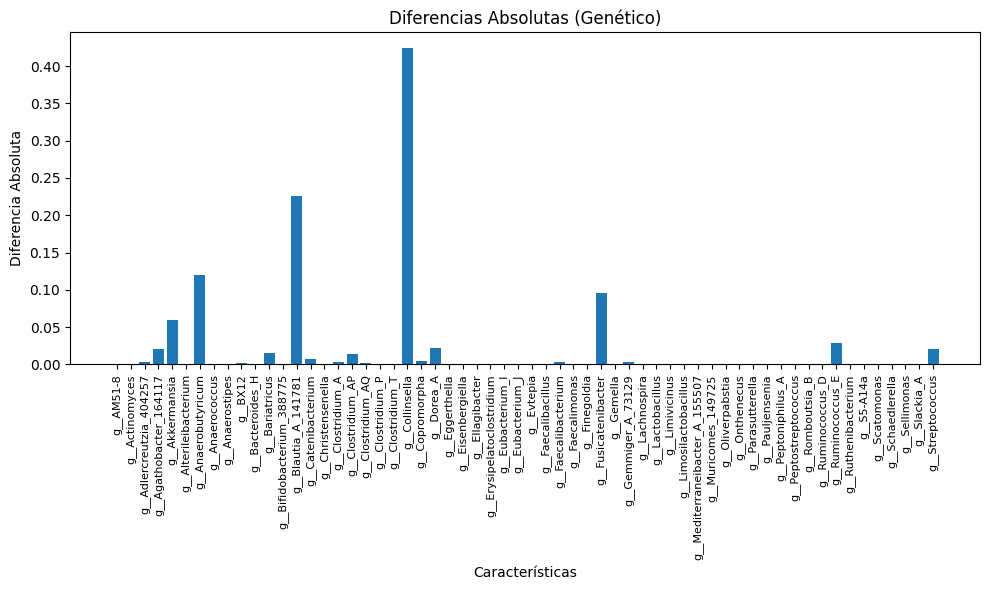

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


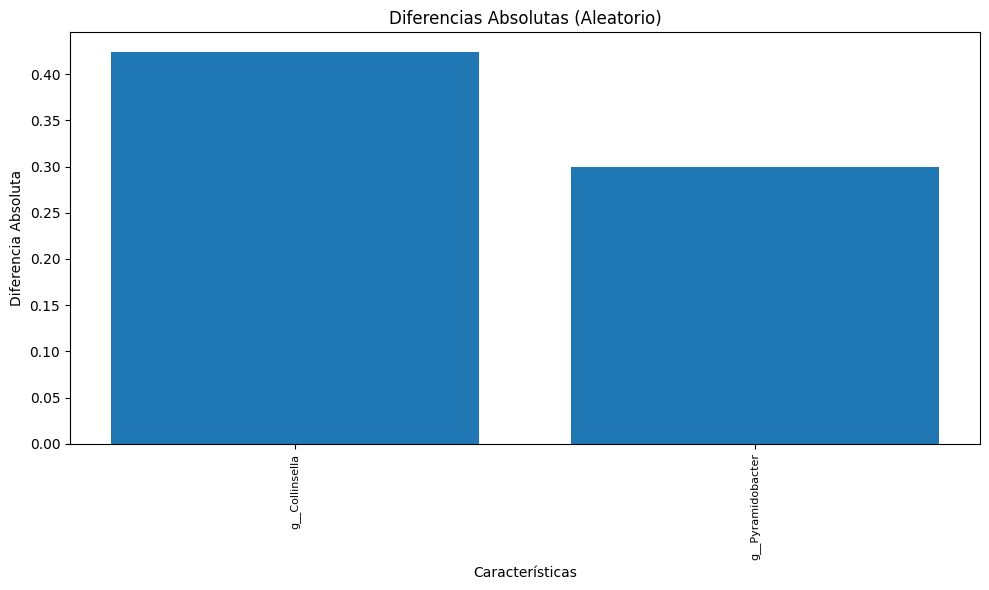

In [ ]:
import matplotlib.pyplot as plt

def plot_difference_histogram(counterfactual, instance, title):
    """
    Crea un histograma de las diferencias absolutas entre las características del contrafactual y la instancia original.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.
    - title: Título del gráfico.
    """
    # Calcular las diferencias absolutas
    differences = (counterfactual - instance).abs()

    # Filtrar solo las características que han cambiado
    changed_features = differences[differences > 0]

    # Crear el histograma
    plt.figure(figsize=(10, 6))
    plt.bar(changed_features.index, changed_features.values)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(title)
    plt.ylabel('Diferencia Absoluta')
    plt.xlabel('Características')
    plt.tight_layout()
    plt.show()

# Aplicar la función a los contrafactuales genético y aleatorio
plot_difference_histogram(df_cfs_list_gen.iloc[0], query_instance.iloc[0], 'Diferencias Absolutas (Genético)')
plot_difference_histogram(df_cfs_list_random.iloc[0], query_instance.iloc[0], 'Diferencias Absolutas (Aleatorio)')

Margen 0.2

In [ ]:
# Calcular las cotas inferiores y superiores
lower_bounds = {}
upper_bounds = {}

for column in X_train_final.columns:
    original_value = query_instance[column].values[0]

    # Calcular la cota inferior como el máximo entre el valor original menos 0.2 y 0
    lower_bound = max(original_value - 0.2, 0)

    # Calcular la cota superior como el mínimo entre el valor original más 0.2 y 1
    upper_bound = min(original_value + 0.2, 1)

    lower_bounds[column] = lower_bound
    upper_bounds[column] = upper_bound

# Crear el diccionario de rangos permitidos
permitted_range = {}

for column in X_train_final.columns:
    # Asegúrate de que no se definan rangos incorrectos si el mínimo es NaN
    if not np.isnan(lower_bounds[column]):
        permitted_range[column] = [lower_bounds[column], upper_bounds[column]]

# Ahora puedes pasar este diccionario como parámetro cuando generes contrafactuales
dice_exp_genetic = exp_genetic.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

dice_exp_random = exp_random.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

# Visualizar los contrafactuales generados
print("Contrafactual generado por el método genético:")
dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

print("Contrafactual generado por el método aleatorio:")
dice_exp_random.visualize_as_dataframe(show_only_changes=True)

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dice_ml/explainer_interfaces/dice_random.py:165: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_instance_df[self.data_interface.outcome_name] = \
100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

Contrafactual generado por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


Contrafactual generado por el método aleatorio:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000066,0.0,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.000165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,6.591957811470006e-05,-,-,-,-,6.591957811470006e-05,-,-,-,0.0001647989452867,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_gen = (df_cfs_list_gen[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_gen = df_cfs_list_gen[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)
print("Número de ceros en el contrafactual genético (sin contar Label):", num_zeros_gen)
print("Suma de las componentes en el contrafactual genético (sin contar Label):", sum_components_gen)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_random = (df_cfs_list_random[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_random = df_cfs_list_random[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)
print("Número de ceros en el contrafactual aleatorio (sin contar Label):", num_zeros_random)
print("Suma de las componentes en el contrafactual aleatorio (sin contar Label):", sum_components_random)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label): 0.4
Número de ceros en el contrafactual genético (sin contar Label): 493
Suma de las componentes en el contrafactual genético (sin contar Label): 1.0


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label): 0.4
Número de ceros en el contrafactual aleatorio (sin contar Label): 437
Suma de las componentes en el contrafactual aleatorio (sin contar Label): 1.075346077785101


In [ ]:
import json
import pandas as pd
from scipy.spatial.distance import euclidean
import numpy as np

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_gen = (df_cfs_list_gen[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_gen = df_cfs_list_gen[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)
print("Número de ceros en el contrafactual genético (sin contar Label):", num_zeros_gen)
print("Suma de las componentes en el contrafactual genético (sin contar Label):", sum_components_gen)

# Calcular la distancia euclidiana para el contrafactual genético
dist_genetic_euclidean = dist_euclidean(df_cfs_list_gen.iloc[0], query_instance.iloc[0])
print("Distancia euclidiana para el contrafactual genético:", dist_genetic_euclidean)

# Calcular la distancia dist_cont para el contrafactual genético
dist_genetic = dist_cont_without_mad(df_cfs_list_gen.iloc[0], query_instance.iloc[0])
print("Distancia dist_cont (sin MAD) para el contrafactual genético:", dist_genetic)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_random = (df_cfs_list_random[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_random = df_cfs_list_random[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)
print("Número de ceros en el contrafactual aleatorio (sin contar Label):", num_zeros_random)
print("Suma de las componentes en el contrafactual aleatorio (sin contar Label):", sum_components_random)

# Calcular la distancia euclidiana para el contrafactual aleatorio
dist_random_euclidean = dist_euclidean(df_cfs_list_random.iloc[0], query_instance.iloc[0])
print("Distancia euclidiana para el contrafactual aleatorio:", dist_random_euclidean)

# Calcular la distancia dist_cont para el contrafactual aleatorio
dist_random = dist_cont_without_mad(df_cfs_list_random.iloc[0], query_instance.iloc[0])
print("Distancia dist_cont (sin MAD) para el contrafactual aleatorio:", dist_random)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label): 0.4
Número de ceros en el contrafactual genético (sin contar Label): 493
Suma de las componentes en el contrafactual genético (sin contar Label): 1.0
Distancia euclidiana para el contrafactual genético: 0.22704025984355697
Distancia dist_cont (sin MAD) para el contrafactual genético: 0.0013956286583380302


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label): 0.4
Número de ceros en el contrafactual aleatorio (sin contar Label): 437
Suma de las componentes en el contrafactual aleatorio (sin contar Label): 1.075346077785101
Distancia euclidiana para el contrafactual aleatorio: 0.10284614579663025
Distancia dist_cont (sin MAD) para el contrafactual aleatorio: 0.00024905157876065894


In [ ]:
def count_changed_features(df_cfs_list, query_instance, column_names):
    """
    Cuenta cuántas características han cambiado en el contrafactual respecto a la instancia original.

    Parameters:
    - df_cfs_list: DataFrame con los valores del contrafactual.
    - query_instance: Serie con los valores originales de la instancia.
    - column_names: Lista con los nombres de las columnas relevantes.

    Returns:
    - Número de características que han cambiado.
    """
    changed_features = (df_cfs_list[column_names].iloc[0] != query_instance[column_names].iloc[0]).sum()
    return changed_features

# Contar cuántas características cambian en el contrafactual genético
num_changed_features_genetic = count_changed_features(df_cfs_list_gen, query_instance, column_names)
print("Número de características que cambian en el contrafactual genético:", num_changed_features_genetic)

# Contar cuántas características cambian en el contrafactual aleatorio
num_changed_features_random = count_changed_features(df_cfs_list_random, query_instance, column_names)
print("Número de características que cambian en el contrafactual aleatorio:", num_changed_features_random)

Número de características que cambian en el contrafactual genético: 60
Número de características que cambian en el contrafactual aleatorio: 2


In [ ]:
def find_out_of_bounds_with_details(df_cfs_list, query_instance, X_train, column_names):
    """
    Identifica las características en el contrafactual que están fuera del rango
    (mínimo y máximo) observado en los datos de entrenamiento, y devuelve su valor original,
    el valor contrafactual, y los valores mínimo y máximo de entrenamiento.

    Parameters:
    - df_cfs_list: DataFrame con los valores del contrafactual.
    - query_instance: Serie con los valores de la instancia original.
    - X_train: DataFrame con los datos de entrenamiento.
    - column_names: Lista con los nombres de las columnas relevantes.

    Returns:
    - out_of_bounds_features: Diccionario con los nombres de las características fuera del rango,
      y sus valores originales, contrafactuales, mínimo y máximo en el entrenamiento.
    """
    min_values = X_train[column_names].min()
    max_values = X_train[column_names].max()

    out_of_bounds_features = {}

    for feature in column_names:
        cf_value = df_cfs_list[feature].iloc[0]
        original_value = query_instance[feature].iloc[0]
        min_value = min_values[feature]
        max_value = max_values[feature]

        if cf_value < min_value or cf_value > max_value:
            out_of_bounds_features[feature] = {
                'Valor original': original_value,
                'Valor contrafactual': cf_value,
                'Mínimo en entrenamiento': min_value,
                'Máximo en entrenamiento': max_value
            }

    return out_of_bounds_features

# Verificar las características fuera de rango en el contrafactual genético
out_of_bounds_features_gen = find_out_of_bounds_with_details(df_cfs_list_gen, query_instance, X_train_final, column_names)

print("Características fuera del rango en el contrafactual genético y sus valores:")
for feature, values in out_of_bounds_features_gen.items():
    print(f"{feature}: Valor original = {values['Valor original']}, "
          f"Valor contrafactual = {values['Valor contrafactual']}, "
          f"Mínimo en entrenamiento = {values['Mínimo en entrenamiento']}, "
          f"Máximo en entrenamiento = {values['Máximo en entrenamiento']}")

# Verificar las características fuera de rango en el contrafactual aleatorio
out_of_bounds_features_random = find_out_of_bounds_with_details(df_cfs_list_random, query_instance, X_train_final, column_names)

print("\nCaracterísticas fuera del rango en el contrafactual aleatorio y sus valores:")
for feature, values in out_of_bounds_features_random.items():
    print(f"{feature}: Valor original = {values['Valor original']}, "
          f"Valor contrafactual = {values['Valor contrafactual']}, "
          f"Mínimo en entrenamiento = {values['Mínimo en entrenamiento']}, "
          f"Máximo en entrenamiento = {values['Máximo en entrenamiento']}")

Características fuera del rango en el contrafactual genético y sus valores:
g__Collinsella: Valor original = 0.4240276862228082, Valor contrafactual = 0.4, Mínimo en entrenamiento = 0.0, Máximo en entrenamiento = 0.2552175006286145

Características fuera del rango en el contrafactual aleatorio y sus valores:
g__Collinsella: Valor original = 0.4240276862228082, Valor contrafactual = 0.4, Mínimo en entrenamiento = 0.0, Máximo en entrenamiento = 0.2552175006286145
g__CAG-873: Valor original = 0.0, Valor contrafactual = 0.1, Mínimo en entrenamiento = 0.0, Máximo en entrenamiento = 0.0153248006356954


In [ ]:
from sklearn.metrics import accuracy_score

# Obtener el valor máximo de 'g__CAG-873' en los datos de entrenamiento
max_value_CAG_873 = X_train_final['g__CAG-873'].max()

# Ajustar el valor de 'g__CAG-873' en el contrafactual aleatorio al valor máximo
adjusted_cf_random = df_cfs_list_random.copy()
adjusted_cf_random['g__CAG-873'] = max_value_CAG_873

# Verificar que el Label del contrafactual se mantenga igual después del ajuste
original_label = best_model.predict(df_cfs_list_random.drop(columns=['Label']).values.reshape(1, -1))[0]
new_label = best_model.predict(adjusted_cf_random.drop(columns=['Label']).values.reshape(1, -1))[0]

# Mostrar los resultados
print(f"Valor máximo de 'g__CAG-873' en el entrenamiento: {max_value_CAG_873}")
print(f"Label original del contrafactual aleatorio: {original_label}")
print(f"Label del contrafactual aleatorio después del ajuste: {new_label}")

# Comprobar si el Label se mantuvo igual
if original_label == new_label:
    print("El Label del contrafactual se mantuvo igual después del ajuste.")
else:
    print("El Label del contrafactual cambió después del ajuste.")

Valor máximo de 'g__CAG-873' en el entrenamiento: 0.0153248006356954
Label original del contrafactual aleatorio: 1
Label del contrafactual aleatorio después del ajuste: 0
El Label del contrafactual cambió después del ajuste.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not ha

In [ ]:
def adjust_features_to_maintain_label(df_cfs_list, query_instance, model, feature_to_maximize, max_value, step_size=0.0001):
    """
    Ajusta las características que han aumentado para intentar mantener el Label constante cuando se ajusta
    una característica específica a su valor máximo permitido.

    Parameters:
    - df_cfs_list: DataFrame con los valores del contrafactual.
    - query_instance: Serie con los valores originales de la instancia.
    - model: Modelo predictivo utilizado para verificar la clase predicha.
    - feature_to_maximize: Nombre de la característica que se desea maximizar.
    - max_value: Valor máximo permitido para la característica a maximizar.
    - step_size: Tamaño del paso para reducir gradualmente las características aumentadas.

    Returns:
    - adjusted_cf: DataFrame con los valores ajustados del contrafactual.
    - final_label: Clase predicha después de los ajustes.
    """
    adjusted_cf = df_cfs_list.copy()
    increased_features = [feature for feature in query_instance.index if adjusted_cf[feature].values[0] > query_instance[feature]]

    for feature in increased_features:
        while adjusted_cf[feature].values[0] > query_instance[feature]:
            # Reducir el valor de la característica en el paso dado
            adjusted_cf[feature] = max(adjusted_cf[feature].values[0] - step_size, query_instance[feature])

            # Ajustar g__CAG-873 al valor máximo permitido
            adjusted_cf[feature_to_maximize] = max_value

            # Verificar la clase predicha después del ajuste
            new_label = model.predict(adjusted_cf.drop(columns=['Label']).values.reshape(1, -1))[0]

            # Si la clase coincide con la original, detener la reducción
            if new_label == model.predict(df_cfs_list.drop(columns=['Label']).values.reshape(1, -1))[0]:
                break

    # Verificar la clase final después de todos los ajustes
    final_label = model.predict(adjusted_cf.drop(columns=['Label']).values.reshape(1, -1))[0]

    return adjusted_cf, final_label

# Aplicar la función para ajustar características y maximizar g__CAG-873 sin cambiar el Label
adjusted_cf_random, final_label = adjust_features_to_maintain_label(
    df_cfs_list_random,
    query_instance.iloc[0],
    best_model,
    feature_to_maximize='g__CAG-873',
    max_value=max_value_CAG_873
)

# Verificar si el Label se mantuvo igual
original_label = best_model.predict(df_cfs_list_random.drop(columns=['Label']).values.reshape(1, -1))[0]

print("Label original del contrafactual aleatorio:", original_label)
print("Label del contrafactual aleatorio después del ajuste:", final_label)

if original_label == final_label:
    print("El Label del contrafactual se mantuvo igual después del ajuste.")
else:
    print("El Label del contrafactual cambió después del ajuste.")


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/

KeyboardInterrupt: 

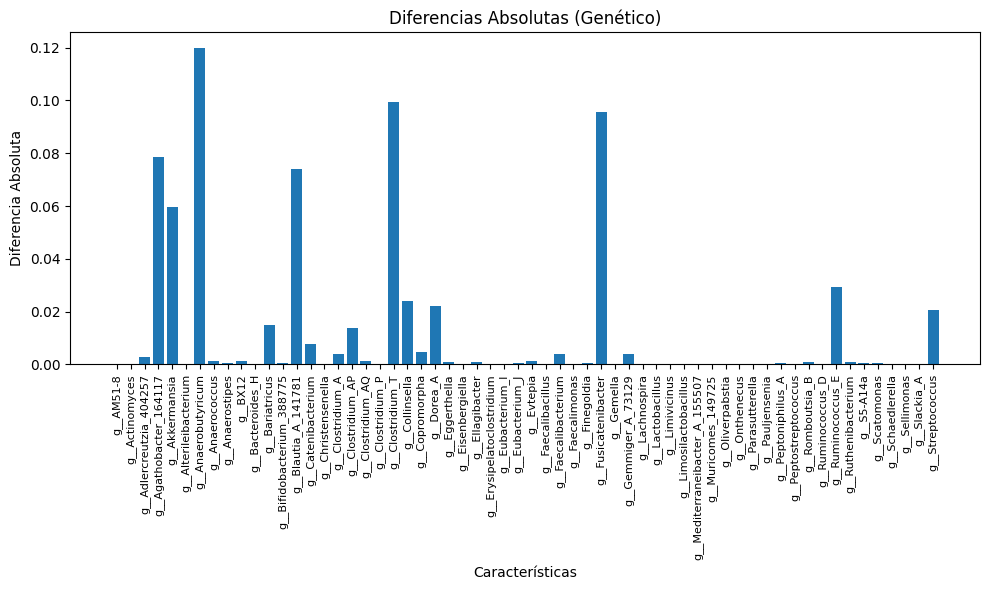

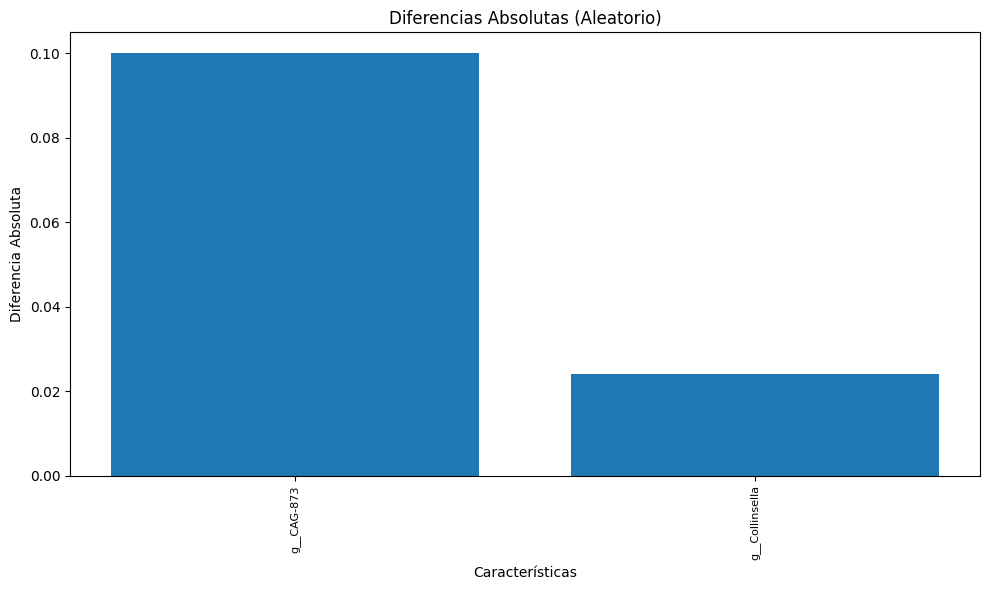

In [ ]:
import matplotlib.pyplot as plt

def plot_difference_histogram(counterfactual, instance, title):
    """
    Crea un histograma de las diferencias absolutas entre las características del contrafactual y la instancia original.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.
    - title: Título del gráfico.
    """
    # Excluir la columna 'Label'
    counterfactual = counterfactual[:-1]
    instance = instance[:-1]

    # Calcular las diferencias absolutas
    differences = (counterfactual - instance).abs()

    # Filtrar solo las características que han cambiado
    changed_features = differences[differences > 0]

    # Crear el histograma
    plt.figure(figsize=(10, 6))
    plt.bar(changed_features.index, changed_features.values)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(title)
    plt.ylabel('Diferencia Absoluta')
    plt.xlabel('Características')
    plt.tight_layout()
    plt.show()

# Aplicar la función a los contrafactuales genético y aleatorio
plot_difference_histogram(df_cfs_list_gen.iloc[0], query_instance.iloc[0], 'Diferencias Absolutas (Genético)')
plot_difference_histogram(df_cfs_list_random.iloc[0], query_instance.iloc[0], 'Diferencias Absolutas (Aleatorio)')

In [ ]:
df_cfs_list_gen['g__Anaerobutyricum']

,g__Anaerobutyricum
0,0.0


In [ ]:
query_instance['g__Anaerobutyricum']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,g__Anaerobutyricum
1090,0.119776


In [ ]:
def obtener_caracteristicas_cambiadas_y_valores(counterfactual, instance):
    """
    Identifica las características que han cambiado en el contrafactual en comparación con la instancia original,
    mostrando sus valores originales, valores en el contrafactual y las diferencias absolutas.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.

    Returns:
    - resultado: DataFrame con las características que cambiaron, mostrando el valor original, el valor del contrafactual y la diferencia.
    """
    # Excluir la columna 'Label'
    counterfactual = counterfactual[:-1]
    instance = instance[:-1]

    # Filtrar solo las características con valores mayores a 0 en el contrafactual
    counterfactual_filtered = counterfactual[counterfactual > 0]

    # Calcular las diferencias absolutas
    differences = (counterfactual_filtered - instance[counterfactual_filtered.index]).abs()

    # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({
        'Valor Original': instance[counterfactual_filtered.index],
        'Valor Contrafactual': counterfactual_filtered,
        'Diferencia': differences
    })

    return resultado

# Aplicación del código
resultados = obtener_caracteristicas_cambiadas_y_valores(df_cfs_list_gen.iloc[0], query_instance.iloc[0])

print("Características cambiadas con valores originales, contrafactuales y diferencias:")
print(resultados)

Características cambiadas con valores originales, contrafactuales y diferencias:
                        Valor Original  Valor Contrafactual  Diferencia
g__Agathobacter_164117        0.021259                  0.1    0.078741
g__Blautia_A_141781           0.226170                  0.3    0.073830
g__Fusicatenibacter           0.004219                  0.1    0.095781
g__Collinsella                0.424028                  0.4    0.024028
g__Clostridium_T              0.000527                  0.1    0.099473


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
import pandas as pd
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore")

def calculate_sparsity_thresholds(X_train):
    """
    Calcula los umbrales para la operación de sparsity.

    Parameters:
    - X_train: DataFrame con el conjunto de entrenamiento.

    Returns:
    - Umbrales calculados para cada característica.
    """
    mad_values = X_train.mad()

    def calculate_percentile_10(x):
        abs_diff = np.abs(x - np.median(x))
        abs_diff_non_median = abs_diff[abs_diff > 0]
        return np.percentile(abs_diff_non_median, 10)

    percentile_10_values = X_train.apply(calculate_percentile_10)

    thresholds = np.minimum(mad_values, percentile_10_values)
    return thresholds

def improve_sparsity(counterfactual, instance, model, thresholds, step_size=0.00001):
    """
    Aplica la operación de sparsity a un contrafactual, restaurando gradualmente hacia el valor original.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.
    - model: Modelo predictivo utilizado para verificar la clase predicha.
    - thresholds: Serie o array con los umbrales de sparsity para cada característica.
    - step_size: Tamaño del paso para restaurar el valor original gradualmente.

    Returns:
    - Contrafactual modificado después de aplicar la operación de sparsity.
    """
    counterfactual = counterfactual.copy()
    original_class = model.predict(counterfactual.values.reshape(1, -1))[0]

    for feature in thresholds.index:
        original_value = instance[feature]
        cf_value = counterfactual[feature]

        if np.abs(cf_value - original_value) <= thresholds[feature]:
            # Restaurar gradualmente hacia el valor original
            while cf_value != original_value:
                direction = np.sign(original_value - cf_value)  # Dirección del cambio
                cf_value += direction * step_size

                # Asegurar que no sobrepasemos el valor original
                if direction > 0:
                    cf_value = min(cf_value, original_value)
                else:
                    cf_value = max(cf_value, original_value)

                # Actualizar el contrafactual con el nuevo valor
                counterfactual[feature] = cf_value

                # Verificar la clase predicha después del ajuste
                predicted_class = model.predict(counterfactual.values.reshape(1, -1))[0]

                if predicted_class != original_class:
                    # Si la clase predicha cambia, revertir el último ajuste y salir del bucle
                    counterfactual[feature] -= direction * step_size
                    break

    return counterfactual

# Asumiendo que query_instance, df_cfs_list_gen, df_cfs_list_random, y best_model ya están definidos en el entorno

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Calcular los umbrales de sparsity
sparsity_thresholds = calculate_sparsity_thresholds(X_train_final[column_names])

# Aplicar la operación de sparsity al contrafactual genético
improved_cf_genetic = improve_sparsity(df_cfs_list_gen[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (genético):")
print(improved_cf_genetic)

# Aplicar la operación de sparsity al contrafactual aleatorio
improved_cf_random = improve_sparsity(df_cfs_list_random[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (aleatorio):")
print(improved_cf_random)

# Reactivar las advertencias si es necesario
warnings.filterwarnings("default")

In [ ]:
# Calcular el máximo, número de ceros y suma de las proporciones para los contrafactuales mejorados

def calculate_metrics(improved_cf, column_names):
    """
    Calcula el máximo valor, el número de ceros y la suma de las proporciones de las características
    de un contrafactual, excluyendo la columna 'Label'.

    Parameters:
    - improved_cf: Serie con los valores del contrafactual mejorado.
    - column_names: Lista con los nombres de las columnas relevantes.

    Returns:
    - max_value: El valor máximo de las características.
    - num_zeros: El número de características con valor cero.
    - sum_proportions: La suma de los valores de las características.
    """
    # Excluir la columna 'Label'
    improved_cf_no_label = improved_cf.drop('Label', errors='ignore')

    # Calcular el máximo valor
    max_value = improved_cf_no_label.max()

    # Calcular el número de ceros
    num_zeros = (improved_cf_no_label == 0).sum()

    # Calcular la suma de las proporciones
    sum_proportions = improved_cf_no_label.sum()

    return max_value, num_zeros, sum_proportions

# Para el contrafactual genético mejorado
max_value_genetic, num_zeros_genetic, sum_proportions_genetic = calculate_metrics(improved_cf_genetic, column_names)
print("Contrafactual mejorado (genético):")
print(f"Máximo valor: {max_value_genetic}")
print(f"Número de ceros: {num_zeros_genetic}")
print(f"Suma de las proporciones: {sum_proportions_genetic}")

# Para el contrafactual aleatorio mejorado
max_value_random, num_zeros_random, sum_proportions_random = calculate_metrics(improved_cf_random, column_names)
print("\nContrafactual mejorado (aleatorio):")
print(f"Máximo valor: {max_value_random}")
print(f"Número de ceros: {num_zeros_random}")
print(f"Suma de las proporciones: {sum_proportions_random}")

In [ ]:
def improve_sparsity(counterfactual, instance, model, thresholds, step_size=0.00001):
    """
    Aplica la operación de sparsity a un contrafactual, restaurando gradualmente hacia el valor original
    solo aquellas características que son mayores en el contrafactual que en la instancia original.

    Parameters:
    - counterfactual: Serie o array con los valores del contrafactual.
    - instance: Serie o array con los valores de la instancia original.
    - model: Modelo predictivo utilizado para verificar la clase predicha.
    - thresholds: Serie o array con los umbrales de sparsity para cada característica.
    - step_size: Tamaño del paso para restaurar el valor original gradualmente.

    Returns:
    - Contrafactual modificado después de aplicar la operación de sparsity.
    """
    counterfactual = counterfactual.copy()
    original_class = model.predict(counterfactual.values.reshape(1, -1))[0]

    for feature in thresholds.index:
        original_value = instance[feature]
        cf_value = counterfactual[feature]

        # Solo modificar si el valor en el contrafactual es mayor que en la instancia original
        if cf_value > original_value and np.abs(cf_value - original_value) <= thresholds[feature]:
            # Restaurar gradualmente hacia el valor original
            while cf_value > original_value:
                direction = -1  # Siempre disminuir el valor para acercarse al original
                cf_value += direction * step_size

                # Asegurar que no sobrepasemos el valor original
                cf_value = max(cf_value, original_value)

                # Actualizar el contrafactual con el nuevo valor
                counterfactual[feature] = cf_value

                # Verificar la clase predicha después del ajuste
                predicted_class = model.predict(counterfactual.values.reshape(1, -1))[0]

                if predicted_class != original_class:
                    # Si la clase predicha cambia, revertir el último ajuste y salir del bucle
                    counterfactual[feature] -= direction * step_size
                    break

    return counterfactual

# Asumiendo que query_instance, df_cfs_list_gen, df_cfs_list_random, y best_model ya están definidos en el entorno

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Calcular los umbrales de sparsity
sparsity_thresholds = calculate_sparsity_thresholds(X_train_final[column_names])

# Aplicar la operación de sparsity al contrafactual genético solo para características mayores en el contrafactual
improved_cf_genetic = improve_sparsity(df_cfs_list_gen[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (genético):")
print(improved_cf_genetic)

# Aplicar la operación de sparsity al contrafactual aleatorio solo para características mayores en el contrafactual
improved_cf_random = improve_sparsity(df_cfs_list_random[column_names].iloc[0], query_instance.iloc[0], best_model, sparsity_thresholds)
print("Contrafactual mejorado (aleatorio):")
print(improved_cf_random)

In [ ]:
# Calcular el máximo, número de ceros y suma de las proporciones para los contrafactuales mejorados

def calculate_metrics(improved_cf, column_names):
    """
    Calcula el máximo valor, el número de ceros y la suma de las proporciones de las características
    de un contrafactual, excluyendo la columna 'Label'.

    Parameters:
    - improved_cf: Serie con los valores del contrafactual mejorado.
    - column_names: Lista con los nombres de las columnas relevantes.

    Returns:
    - max_value: El valor máximo de las características.
    - num_zeros: El número de características con valor cero.
    - sum_proportions: La suma de los valores de las características.
    """
    # Excluir la columna 'Label'
    improved_cf_no_label = improved_cf.drop('Label', errors='ignore')

    # Calcular el máximo valor
    max_value = improved_cf_no_label.max()

    # Calcular el número de ceros
    num_zeros = (improved_cf_no_label == 0).sum()

    # Calcular la suma de las proporciones
    sum_proportions = improved_cf_no_label.sum()

    return max_value, num_zeros, sum_proportions

# Para el contrafactual genético mejorado
max_value_genetic, num_zeros_genetic, sum_proportions_genetic = calculate_metrics(improved_cf_genetic, column_names)
print("Contrafactual mejorado (genético):")
print(f"Máximo valor: {max_value_genetic}")
print(f"Número de ceros: {num_zeros_genetic}")
print(f"Suma de las proporciones: {sum_proportions_genetic}")

# Para el contrafactual aleatorio mejorado
max_value_random, num_zeros_random, sum_proportions_random = calculate_metrics(improved_cf_random, column_names)
print("\nContrafactual mejorado (aleatorio):")
print(f"Máximo valor: {max_value_random}")
print(f"Número de ceros: {num_zeros_random}")
print(f"Suma de las proporciones: {sum_proportions_random}")

In [ ]:
# Calcular las cotas inferiores y superiores
lower_bounds = {}
upper_bounds = {}

for column in X_train_final.columns:
    original_value = query_instance[column].values[0]
    max_value_training = X_train_final[column].max()

    # Calcular la cota inferior como el máximo entre el valor original menos 0.2 y 0
    lower_bound = max(original_value - 0.2, 0)

    # Calcular la cota superior como el mínimo entre 1, el valor original más 0.2, y el máximo de entrenamiento
    upper_bound = min(1, original_value + 0.2, max_value_training)

    lower_bounds[column] = lower_bound
    upper_bounds[column] = upper_bound

# Crear el diccionario de rangos permitidos
permitted_range = {}

for column in X_train_final.columns:
    # Asegúrate de que no se definan rangos incorrectos si el mínimo es NaN
    if not np.isnan(lower_bounds[column]):
        permitted_range[column] = [lower_bounds[column], upper_bounds[column]]

# Ahora puedes pasar este diccionario como parámetro cuando generes contrafactuales
dice_exp_genetic = exp_genetic.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

dice_exp_random = exp_random.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

# Visualizar los contrafactuales generados
print("Contrafactual generado por el método genético:")
dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

print("Contrafactual generado por el método aleatorio:")
dice_exp_random.visualize_as_dataframe(show_only_changes=True)

In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_gen = (df_cfs_list_gen[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_gen = df_cfs_list_gen[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)
print("Número de ceros en el contrafactual genético (sin contar Label):", num_zeros_gen)
print("Suma de las componentes en el contrafactual genético (sin contar Label):", sum_components_gen)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

# Calcular el número de ceros (sin contar la columna 'Label')
num_zeros_random = (df_cfs_list_random[column_names] == 0).sum().sum()

# Calcular la suma de las componentes (sin contar la columna 'Label')
sum_components_random = df_cfs_list_random[column_names].sum().sum()

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)
print("Número de ceros en el contrafactual aleatorio (sin contar Label):", num_zeros_random)
print("Suma de las componentes en el contrafactual aleatorio (sin contar Label):", sum_components_random)

In [ ]:
# Crear una función auxiliar para calcular el mínimo distinto de 0
def min_non_zero(series):
    non_zero_values = series[series != 0]
    if len(non_zero_values) > 0:
        return non_zero_values.min()
    else:
        return np.nan  # Si todos los valores son 0, devuelve NaN (puedes ajustar según tu necesidad)

# Calcular los mínimos y máximos para cada columna del conjunto de datos
min_values = X_train_final.apply(min_non_zero)
max_values = X_train_final.max()

print(min_values)
print(max_values)

In [ ]:
# Calcular las cotas inferiores y superiores
lower_bounds = min_values
upper_bounds = X_train_final.quantile(0.75)

# Crear el diccionario de rangos permitidos
permitted_range = {}

for column in X_train_final.columns:
    # Asegúrate de que no se definan rangos incorrectos si el mínimo es NaN
    if not np.isnan(min_values[column]):
        permitted_range[column] = [lower_bounds[column], upper_bounds[column]]

# Ahora puedes pasar este diccionario como parámetro cuando generes contrafactuales
dice_exp_genetic = exp_genetic.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

dice_exp_random = exp_random.generate_counterfactuals(
    query_instance,
    total_CFs=1,
    desired_class="opposite",
    permitted_range=permitted_range
)

# Visualizar los contrafactuales generados
print("Contrafactual generado por el método genético:")
dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

print("Contrafactual generado por el método aleatorio:")
dice_exp_random.visualize_as_dataframe(show_only_changes=True)

In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

# Para el contrafactual genético
query_instance_gen = query_instance.copy()
query_instance_gen['Label'] = 1

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_gen = max(df_cfs_list_gen[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual genético (sin contar Label):", max_value_gen)

# Para el contrafactual aleatorio
json_str_random = dice_exp_random.to_json()  # Asegúrate de que dice_exp_random es la salida del método aleatorio
json_data_random = json.loads(json_str_random)
cfs_list_random = json_data_random['cfs_list'][0]
df_cfs_list_random = pd.DataFrame(cfs_list_random, columns=column_names + ['Label'])

# Calcular el máximo de la última fila del describe sin contar la columna 'Label'
max_value_random = max(df_cfs_list_random[column_names].describe().iloc[-1])

print("Máximo valor de la última fila del describe para el contrafactual aleatorio (sin contar Label):", max_value_random)

In [ ]:
# Asumiendo que df_cfs_list_gen y df_cfs_list_random están disponibles como en la imagen

# Sumar todas las columnas excepto 'Label' para el contrafactual genético
sum_gen = df_cfs_list_gen.sum(axis=1).iloc[0]

# Sumar todas las columnas excepto 'Label' para el contrafactual aleatorio
sum_random = df_cfs_list_random.sum(axis=1).iloc[0]

print(sum_gen)
print(sum_random)